In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

In [2]:
np.random.seed(42)
n_estimation = 100
n_cluster = 300
p_list = [0.3, 0.5, 0.8]
p_arr = np.random.choice(p_list, size=n_cluster)
cluster_centers = np.random.rand(n_cluster,2)
binom_sample = np.array([stats.binom.rvs(n_estimation, p) for p in p_arr])

In [3]:
px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], size=binom_sample, color=p_arr)

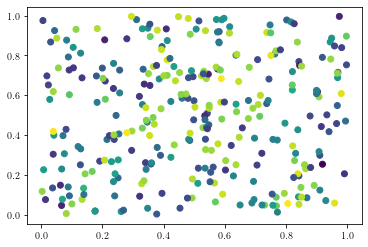

In [4]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=binom_sample)

In [5]:
from BinomialSimilarityGrouping import BSG

In [6]:
bsg = BSG(n_estimation, verbose=True, p_penalization= lambda x:np.exp(x))

In [7]:
linkage_matrix = bsg.fit_hierarchy(cluster_centers, binom_sample, p_arr)
labels = bsg.predict_hierarchy(10)
np.unique(labels, return_counts=True)

Compute spatial distance
Compute probability distance
Compute Linkage matrix


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([20, 29, 46, 17, 13, 42, 29, 35, 27, 42], dtype=int64))

In [10]:
bsg.save("test_save.pkl")
del bsg
bsg = BSG()
bsg.load("test_save.pkl")
bsg

In [20]:
fig = px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], size=binom_sample, color=labels)
fig.show()